# Data Preprocessing

### Context

Originally this dataset was collected from the Diabetes and Digestive and Cinderella National Institute. The purpose of the dataset is to determine, based on some diagnostic tests used in the dataset, whether or not a patient is suffering from diabetes. The extraction of these instances from a broader database was subject to certain restrictions. All patients here are females from Pima's Indian descent who are at least 21 years old.

### Content

The data sets consist of multiple variables of the medical predictor and an outcome variable. Variables in the indicator include number of births, BMI, level of insulin, age, etc.

Pregnancies - Number of times pregnant
Glucose - Plasma glucose concentration a 2 hours in an oral glucose tolerance test
BloodPressure - Diastolic blood pressure (mm Hg)
SkinThickness - Triceps skin fold thickness (mm)
Insulin - 2-Hour serum insulin (mu U/ml)
BMI - Body mass index
DiabetesPedigreeFunction - Diabetes pedigree function
Age - Years of age
Outcome - Class variable (0 or 1) 268 of 768 are 1, the others are 0


Dataset source: ('https://www.kaggle.com/uciml/pima-indians-diabetes-database')

In [159]:
import pandas as pd
import scipy as sc
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno 


from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

from imblearn.over_sampling import SMOTE

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [160]:
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### Converting column types

In [162]:
print(df.dtypes)
df["Pregnancies"] = df["Pregnancies"].astype("float")
df["Glucose"] = df["Glucose"].astype("float")
df["BloodPressure"] = df["BloodPressure"].astype("float")
df["SkinThickness"] = df["SkinThickness"].astype("float")
df["Insulin"] = df["Insulin"].astype("float")
df["BMI"] = df["BMI"].astype("float")
df["DiabetesPedigreeFunction"] = df["DiabetesPedigreeFunction"].astype("float")
df["Age"] = df["Age"].astype("float")
df["Outcome"] = df["Outcome"].astype("float")

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


### Modeling without normalizing

In [163]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


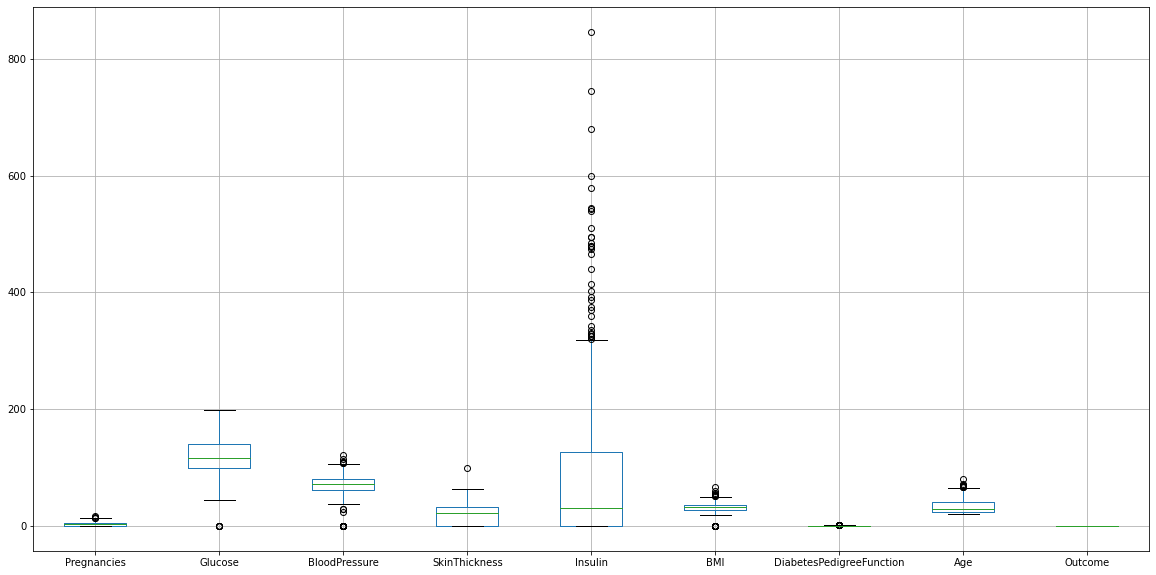

In [164]:
df.boxplot(figsize = (20, 10))
plt.show()

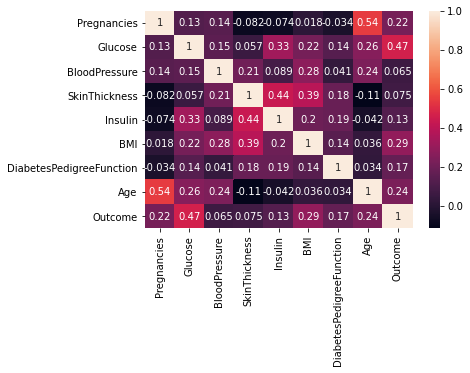

In [165]:
sns.heatmap(df.corr(),annot=True)

In [166]:
temp_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']  
df[temp_cols] = df[temp_cols].replace(0, np.nan)
print(df.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


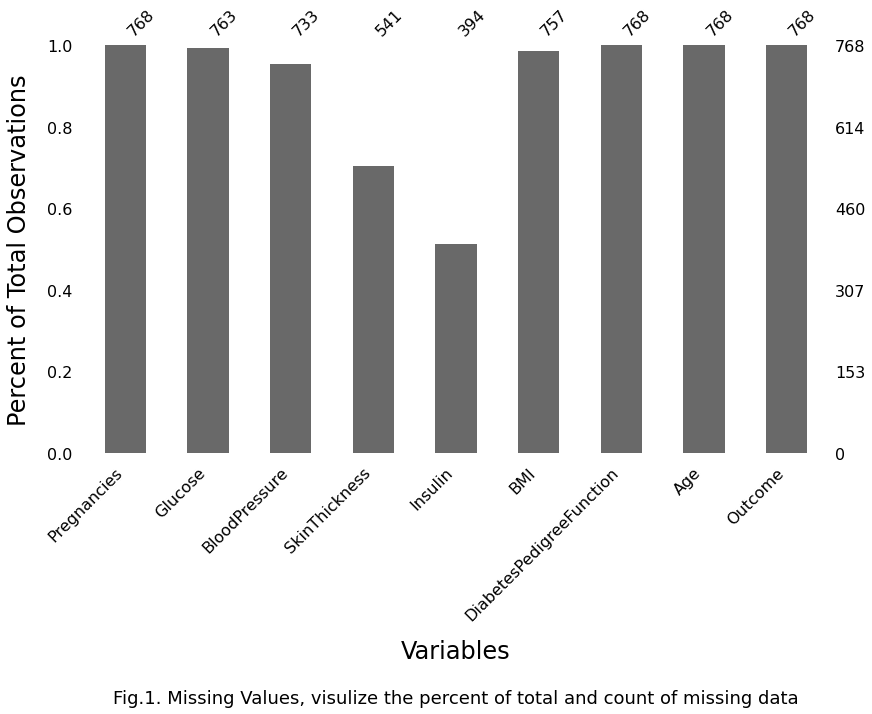

In [167]:
fig,ax = plt.subplots()
fig = msno.bar(df, inline=False, figsize=(13.33,7.5))

ax.set_xlabel('Variables', size=24, labelpad=16)
ax.set_ylabel('Percent of Total Observations', size=24, labelpad=16)
ax.tick_params(axis='both', labelsize=16, length=8)

fignum = 1
figtxt = ". Missing Values, visulize the percent of total and count of missing data"
figcap = "Fig." + str(fignum) + figtxt
ax.text(0.5, -0.6, figcap, fontsize=18, ha='center', va='center', transform=ax.transAxes)
plt.savefig('fig' + str(fignum) + '-missing-bar-chart.png', bbox_inches='tight')

plt.show;

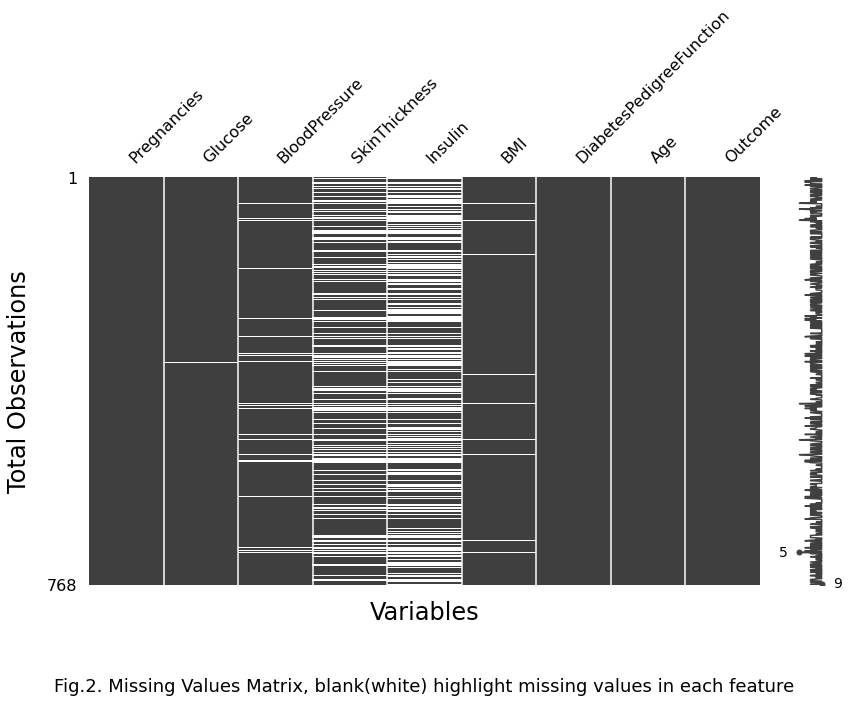

In [168]:
fig = msno.matrix(df, inline=False, figsize=(13.33,7.5))

plt.xlabel('Variables', size=24, labelpad=16)
plt.ylabel('Total Observations', size=24, labelpad=16)
plt.tick_params(axis='both', labelsize=16, length=8)

fignum += 1
figtxt = ". Missing Values Matrix, blank(white) highlight missing values in each feature"
figcap = "Fig." + str(fignum) + figtxt
plt.text(0.5, -0.25, figcap, fontsize=18, ha='center', va='center', transform=fig.transAxes)
plt.savefig('fig' + str(fignum) + '-missing-data-matrix.png', bbox_inches='tight')

plt.show;

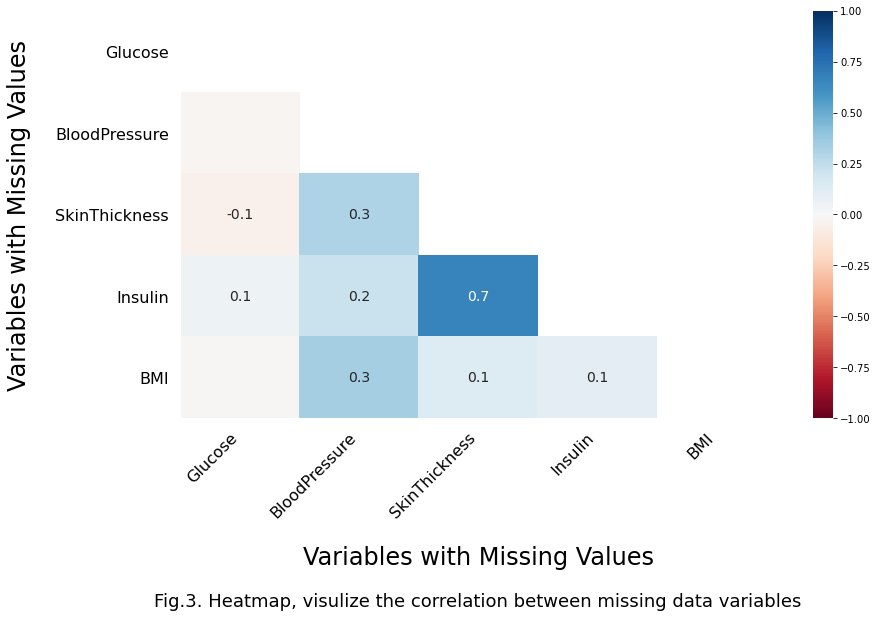

In [169]:
fig = msno.heatmap(df, inline=False, figsize=(13.33,7.5))

plt.xlabel('Variables with Missing Values', size=24, labelpad=24)
plt.ylabel('Variables with Missing Values', size=24, labelpad=24)
plt.tick_params(axis='both', labelsize=16, length=8)

fignum += 1
figtxt = ". Heatmap, visulize the correlation between missing data variables"
figcap = "Fig." + str(fignum) + figtxt
plt.text(0.5, -0.45, figcap, fontsize=18, ha='center', va='center', transform=fig.transAxes)
plt.savefig('fig' + str(fignum) + '-missing-data-heatmap.png', bbox_inches='tight')

plt.show;

## Delete Missing Values

In [170]:
print('----- Listwise Deletion -----\n')

diabetes_copy = df.copy(deep=True)
print("Original Data {}".format(diabetes_copy.shape))
diabetes_copy.dropna(inplace=True)
print("After Deletion {}".format(diabetes_copy.shape))

print('\n----- Pairwise Deletion -----\n')

diabetes_copy = df.copy(deep=True)['Insulin'].replace(np.nan, 0)
print("Original Data Mean {}".format(diabetes_copy.mean(skipna=False)))
diabetes_copy = df.copy(deep=True)
print("After Deletion Mean {}".format(diabetes_copy['Insulin'].mean()))      

print('\n----- Dropping Variables -----\n')

diabetes_copy = df.copy(deep=True)
print("Original Data {}".format(diabetes_copy.shape))
diabetes_copy.drop(columns=['SkinThickness', 'Insulin'], inplace=True)
print("After Deletion {}".format(diabetes_copy.shape))

----- Listwise Deletion -----

Original Data (768, 9)
After Deletion (392, 9)

----- Pairwise Deletion -----

Original Data Mean 79.79947916666667
After Deletion Mean 155.5482233502538

----- Dropping Variables -----

Original Data (768, 9)
After Deletion (768, 7)


## Impute Missing Values

### Simple Imputer

In [208]:
X = df[df.columns[:-1]]
y = df.columns[-1]

print('Original')
print(X[['BloodPressure', 'SkinThickness', 'Insulin']].describe())

imputer = SimpleImputer(strategy='mean') 

imputer.fit(X)

Xtrans = imputer.transform(X)

print('')
print('Changed')
print(pd.DataFrame(Xtrans, columns=X.columns)[['BloodPressure', 'SkinThickness', 'Insulin']].describe())

Original
       BloodPressure  SkinThickness     Insulin
count     733.000000     541.000000  394.000000
mean       72.405184      29.153420  155.548223
std        12.382158      10.476982  118.775855
min        24.000000       7.000000   14.000000
25%        64.000000      22.000000   76.250000
50%        72.000000      29.000000  125.000000
75%        80.000000      36.000000  190.000000
max       122.000000      99.000000  846.000000

Changed
       BloodPressure  SkinThickness     Insulin
count     768.000000     768.000000  768.000000
mean       72.405184      29.153420  155.548223
std        12.096346       8.790942   85.021108
min        24.000000       7.000000   14.000000
25%        64.000000      25.000000  121.500000
50%        72.202592      29.153420  155.548223
75%        80.000000      32.000000  155.548223
max       122.000000      99.000000  846.000000


### KNN Imputer

In [207]:
X = df[df.columns[:-1]]
y = df.columns[-1]

print('Original')
print(X[['BloodPressure', 'SkinThickness', 'Insulin']].describe())

knn_imputer = KNNImputer(n_neighbors=2, weights='uniform')
Xtrans = knn_imputer.fit_transform(X)

print('')
print('Changed')
print(pd.DataFrame(Xtrans, columns=X.columns)[['BloodPressure', 'SkinThickness', 'Insulin']].describe())

Original
       BloodPressure  SkinThickness     Insulin
count     733.000000     541.000000  394.000000
mean       72.405184      29.153420  155.548223
std        12.382158      10.476982  118.775855
min        24.000000       7.000000   14.000000
25%        64.000000      22.000000   76.250000
50%        72.000000      29.000000  125.000000
75%        80.000000      36.000000  190.000000
max       122.000000      99.000000  846.000000

Changed
       BloodPressure  SkinThickness     Insulin
count     768.000000     768.000000  768.000000
mean       72.354818      29.147135  154.886719
std        12.283460       9.778470  105.099491
min        24.000000       7.000000   14.000000
25%        64.000000      22.000000   84.000000
50%        72.000000      29.000000  129.000000
75%        80.000000      36.000000  193.000000
max       122.000000      99.000000  846.000000


### Mice Imputer

In [210]:
X = df[df.columns[:-1]]
y = df.columns[-1]

print('Original')
print(X[['BloodPressure', 'SkinThickness', 'Insulin']].describe())

mice_imputer = IterativeImputer()
Xtrans = mice_imputer.fit_transform(X)

print('')
print('Changed')
print(pd.DataFrame(Xtrans, columns=X.columns)[['BloodPressure', 'SkinThickness', 'Insulin']].describe())

Original
       BloodPressure  SkinThickness     Insulin
count     733.000000     541.000000  394.000000
mean       72.405184      29.153420  155.548223
std        12.382158      10.476982  118.775855
min        24.000000       7.000000   14.000000
25%        64.000000      22.000000   76.250000
50%        72.000000      29.000000  125.000000
75%        80.000000      36.000000  190.000000
max       122.000000      99.000000  846.000000

Changed
       BloodPressure  SkinThickness     Insulin
count     768.000000     768.000000  768.000000
mean       72.352451      28.906892  152.650328
std        12.147216       9.521956   97.342139
min        24.000000       7.000000  -19.507362
25%        64.000000      22.120844   89.983889
50%        72.000000      28.447099  130.185304
75%        80.000000      35.000000  190.000000
max       122.000000      99.000000  846.000000


### Treating Outliers and Splitting 

In [185]:
cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']
list = Xtrans.tolist()
df_clean = pd.DataFrame(list,columns=cols)
df_clean

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72.0,35.000000,218.922943,33.6,0.627,50.0
1,1.0,85.0,66.0,29.000000,70.302975,26.6,0.351,31.0
2,8.0,183.0,64.0,21.532622,268.502252,23.3,0.672,32.0
3,1.0,89.0,66.0,23.000000,94.000000,28.1,0.167,21.0
4,0.0,137.0,40.0,35.000000,168.000000,43.1,2.288,33.0
...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.000000,180.000000,32.9,0.171,63.0
764,2.0,122.0,70.0,27.000000,158.727965,36.8,0.340,27.0
765,5.0,121.0,72.0,23.000000,112.000000,26.2,0.245,30.0
766,1.0,126.0,60.0,27.881441,173.505948,30.1,0.349,47.0


In [186]:
Y = df.Outcome
x = df_clean

columns = x.columns

scaler = StandardScaler()
X = scaler.fit_transform(x)
data_x = pd.DataFrame(X, columns = columns)

In [187]:
x_train, x_test, y_train, y_test = train_test_split(data_x, Y, test_size = 0.15, random_state = 45)

print("Ratio of Diabetes to Non-Diabetic Labels in training dataset is: {}".format(round(y_train.value_counts()[0] \
                                                                                         /len(y_train),2)))
print("Ratio of Diabetes to Non-Diabetic Labels in testing dataset is: {}".format(round(y_test.value_counts()[0] \
                                                                                         /len(y_test),2)))

Ratio of Diabetes to Non-Diabetic Labels in training dataset is: 0.65
Ratio of Diabetes to Non-Diabetic Labels in testing dataset is: 0.64


In [188]:
df['Outcome'].value_counts()

0.0    500
1.0    268
Name: Outcome, dtype: int64

In [190]:
smt = SMOTE()

x_train, y_train = smt.fit_sample(x_train, y_train)
np.bincount(y_train)

array([426, 426], dtype=int64)

## Model Fitting

### Logistic Regression

In [205]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)

print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(x_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.73


### Support Vector Machine 

In [203]:
from sklearn.svm import SVC
classifier_rbf = SVC(kernel = 'rbf')
classifier_rbf.fit(x_train, y_train)
y_pred = classifier_rbf.predict(x_test)

print('Accuracy of SVC (RBF) classifier on test set: {:.2f}'.format(classifier_rbf.score(x_test, y_test)))

Accuracy of SVC (RBF) classifier on test set: 0.74


### Random Forest

In [202]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=300, bootstrap = True, max_features = 'sqrt')
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print('Accuracy of Random Forest on test set: {:.2f}'.format(model.score(x_test, y_test)))

Accuracy of Random Forest on test set: 0.77


## Conclusion

A domain awareness about the dataset is also important as it produces more stable data models and better performance by taking the right decision about managing missing values.

Feature Importance findings make sense as the glucose level really is a first thing to be tracked in high risk patients. A higher BMI can also mean that Type 2 diabetes may progress. Normally there is a high risk of developing, in particular with type II diabetes, as a person's age grows.

Record Score: 99